<a href="https://colab.research.google.com/github/nitin578/103_Country_Covid19_Vaccinations/blob/main/Covid19__Country_Vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
india_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/India.csv")

In [ ]:
india_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,source_url,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,https://twitter.com/MoHFW_INDIA/status/1350459...,NaN
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,https://twitter.com/MoHFW_INDIA/status/1350815...,NaN
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,https://www.mohfw.gov.in/,NaN
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,https://www.mohfw.gov.in/,NaN


#DATA CLEANING

In [ ]:
# removing unwanted columns
columns_to_remove = ['source_url']
india_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [ ]:
# removing unwanted columns
columns_to_remove = ['total_boosters']
india_df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [ ]:
#Replacing the NaN values to 0
india_df["total_boosters"].fillna("0", inplace = True)

In [ ]:
india_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",0,0,0,0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",191181,191181,0,0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",224301,224301,0,0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",454049,454049,0,0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",674835,674835,0,0


In [ ]:
india_df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [ ]:
# check the unique values in vaccine column
india_df.vaccine.unique()

array(['Covaxin, Oxford/AstraZeneca',
       'Covaxin, Oxford/AstraZeneca, Sputnik V'], dtype=object)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total number of vaccine doses administered in India')

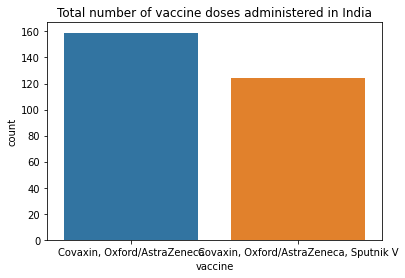

In [ ]:
sns.countplot(india_df['vaccine'])
plt.title("Total number of vaccine doses administered in India")

In [ ]:
# describe the data
# Numerical values
numerical_features = [feature for feature in india_df.columns if india_df[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  3


In [ ]:
india_df[numerical_features].head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,0,0,0
1,191181,191181,0
2,224301,224301,0
3,454049,454049,0
4,674835,674835,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc42d3a6550>,
      dtype=object)

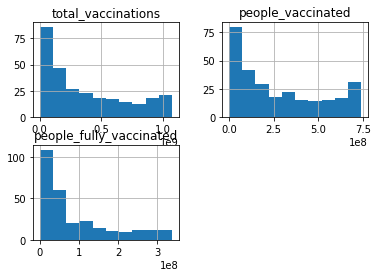

In [ ]:
india_df[numerical_features].hist()

1077107323


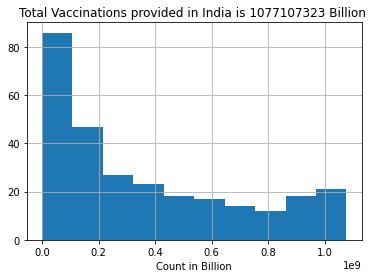

In [ ]:
india_df[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count in Billion")
plt.title("Total Vaccinations provided in India is 1077107323 Billion ")
column = india_df["total_vaccinations"]
max_value = column.max()
print(max_value)


337749522


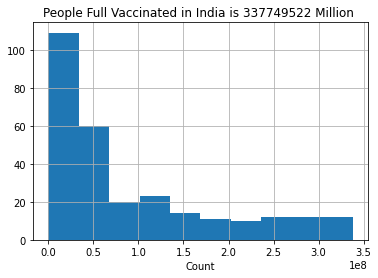

In [ ]:
india_df[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count")
plt.title("People Full Vaccinated in India is 337749522 Million ")
column = india_df["people_fully_vaccinated"]
max_value = column.max()
print(max_value)

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline


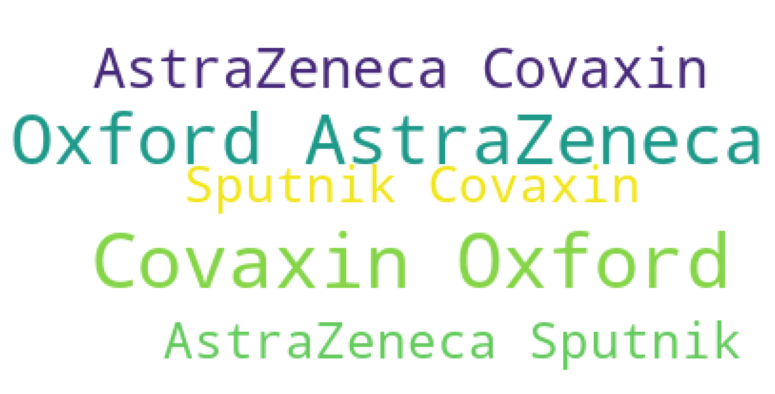

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 40).generate(' '.join(india_df.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()


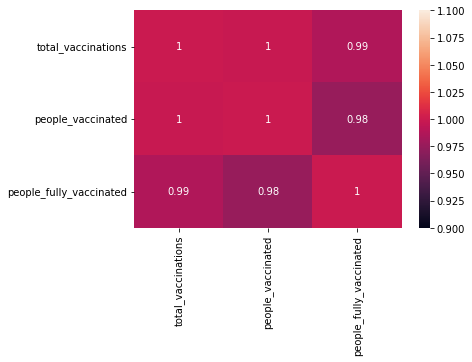

In [ ]:
sns.heatmap(india_df[numerical_features].corr(), vmin=1, vmax=1, annot=True)

In [ ]:
# describe the data
# categorical values
categorical_features = [feature for feature in india_df.columns if india_df[feature].dtype == 'O']
print('Number of numerical variables: ', len(categorical_features))

Number of numerical variables:  3


In [ ]:
india_df[categorical_features].head()

,location,date,vaccine
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca"
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca"
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca"
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca"
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca"


In [ ]:
# converting the column date from string into datetime object
india_df.dtypes

location                   object
date                       object
vaccine                    object
total_vaccinations          int64
people_vaccinated           int64
people_fully_vaccinated     int64
dtype: object

In [ ]:
from datetime import datetime

In [ ]:
india_df['date'] = india_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
india_df.dtypes

location                           object
date                       datetime64[ns]
vaccine                            object
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
dtype: object

In [ ]:
india_df[numerical_features].describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,2.830000e+02,2.830000e+02,2.830000e+02
mean,3.615130e+08,2.739400e+08,8.757301e+07
std,3.373545e+08,2.425015e+08,9.657203e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.040011e+07,5.155084e+07,8.849274e+06
50%,2.402819e+08,1.943260e+08,4.595591e+07
75%,6.011572e+08,4.657360e+08,1.354212e+08
max,1.077107e+09,7.393578e+08,3.377495e+08


In [ ]:
india_df[categorical_features].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,location,date,vaccine
count,283,283,283
unique,1,283,2
top,India,2021-05-04 00:00:00,"Covaxin, Oxford/AstraZeneca"
freq,283,1,159
first,NaN,2021-01-15 00:00:00,NaN
last,NaN,2021-11-04 00:00:00,NaN


#Missing values

In [ ]:
india_df.isnull().count()

location                   283
date                       283
vaccine                    283
total_vaccinations         283
people_vaccinated          283
people_fully_vaccinated    283
dtype: int64

In [ ]:
india_df.isnull().values.any()

False

In [ ]:
display(india_df.dtypes.value_counts())

int64             3
object            2
datetime64[ns]    1
dtype: int64

#Ukraine Dataset

In [ ]:
ukraine_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/Ukraine.csv")

In [ ]:
ukraine_df.head()

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Ukraine,2021-02-24,Oxford/AstraZeneca,159,159,0,NaN
1,Ukraine,2021-02-25,Oxford/AstraZeneca,1338,1338,0,NaN
2,Ukraine,2021-02-26,Oxford/AstraZeneca,3051,3051,0,NaN
3,Ukraine,2021-02-27,Oxford/AstraZeneca,3141,3141,0,NaN
4,Ukraine,2021-03-01,Oxford/AstraZeneca,4905,4905,0,NaN


In [ ]:
#DataCleaning
#Replacing the NaN values to 0
ukraine_df["total_boosters"].fillna("0", inplace = True)

In [ ]:
#unique vaues in vaccine columns
ukraine_df.vaccine.unique()

array(['Oxford/AstraZeneca', 'Oxford/AstraZeneca, Sinovac',
       'Oxford/AstraZeneca, Sinovac, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Sinovac, Pfizer/BioNTech'],
      dtype=object)

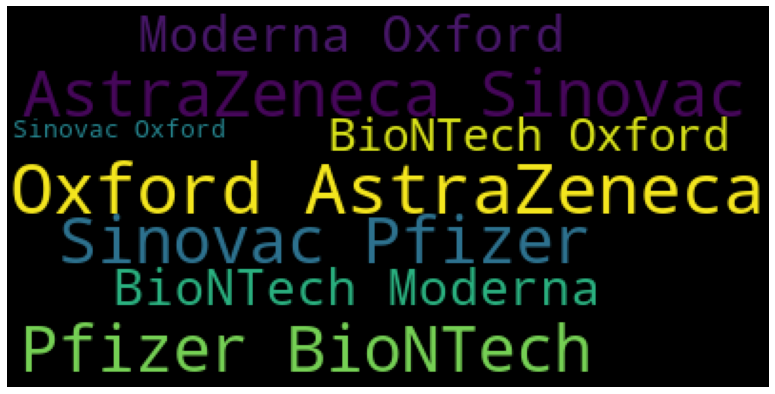

In [ ]:
wordCloud = WordCloud(
    background_color='black',
    max_font_size = 40).generate(' '.join(ukraine_df.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [ ]:
ukraine_df.shape

(238, 8)

In [ ]:
ukraine_df.dtypes

In [ ]:
ukraine_df.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

Oxford/AstraZeneca, Sinovac, Pfizer/BioNTech


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


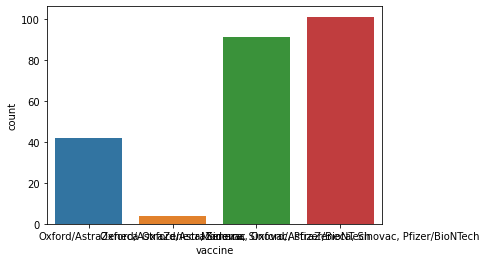

In [ ]:
sns.countplot(ukraine_df['vaccine'])
column = ukraine_df["vaccine"]
max_value = column.max()
print(max_value)

In [ ]:
# Numerical features
numerical_features = [feature for feature in ukraine_df.columns if ukraine_df[feature].dtype != 'O']
print('Numer of numerical variable: ', len(numerical_features))

Numer of numerical variable:  3


In [ ]:
ukraine_df[numerical_features].head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,159,159,0
1,1338,1338,0
2,3051,3051,0
3,3141,3141,0
4,4905,4905,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3f7445490>,
      dtype=object)

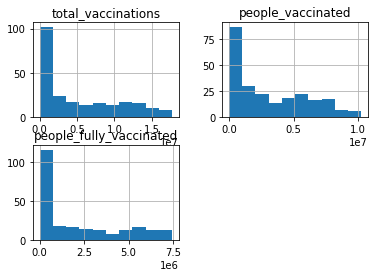

In [ ]:
ukraine_df[numerical_features].hist()

10245773


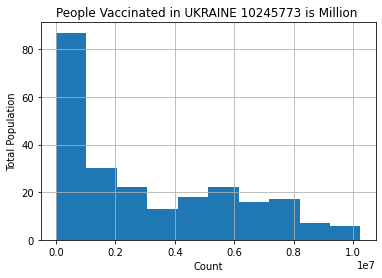

In [ ]:
ukraine_df[numerical_features].hist(column = 'people_vaccinated')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("People Vaccinated in UKRAINE 10245773 is Million ")
column = ukraine_df["people_vaccinated"]
max_value = column.max()
print(max_value)

7449818


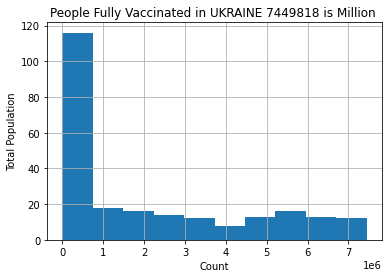

In [ ]:
#Q1
ukraine_df[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("People Fully Vaccinated in UKRAINE 7449818 is Million ")
column = ukraine_df["people_fully_vaccinated"]
max_value = column.max()
print(max_value)

17695591


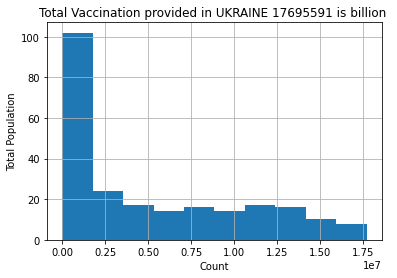

In [166]:
#Q1
ukraine_df[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("Total Vaccination provided in UKRAINE 17695591 is billion ")
column = ukraine_df["total_vaccinations"]
max_value = column.max()
print(max_value)

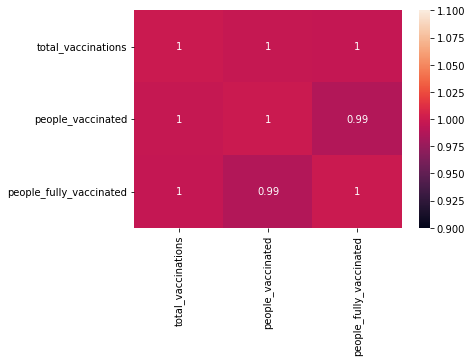

In [ ]:
sns.heatmap(ukraine_df[numerical_features].corr(), vmin=1, vmax=1, annot=True)

In [ ]:
#Canada and US dataset
#Q3 Comparison between 2 large countries
US_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/US.csv")

In [ ]:
US_df.head()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,source_url,vaccine
0,2020-12-13,United States,20013,17073,3579,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
1,2020-12-14,United States,24300,21231,3668,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
2,2020-12-15,United States,72853,67597,3851,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
3,2020-12-16,United States,231420,220759,4214,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
4,2020-12-17,United States,501644,484011,4743,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech


In [ ]:
US_df.dtypes

date                       object
location                   object
total_vaccinations          int64
people_vaccinated           int64
people_fully_vaccinated     int64
total_boosters              int64
source_url                 object
vaccine                    object
dtype: object

In [ ]:
US_df.shape

(327, 8)

In [ ]:
Canada_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/Canada.csv")

In [ ]:
first_column = Canada_df.pop('location')
Canada_df.insert(1, 'location',first_column)

In [ ]:
Canada_df.shape

(322, 8)

In [ ]:
first_column = Canada_df.pop('people_vaccinated')
Canada_df.insert(3, 'people_vaccinated',first_column)

In [ ]:
Canada_df.tail()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,source_url,vaccine
317,2021-10-27,Canada,58428432,29772195,28144619,511618,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
318,2021-10-28,Canada,58511813,29797297,28185778,528738,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
319,2021-10-29,Canada,58589032,29823959,28225947,539126,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
320,2021-10-30,Canada,58629704,29835311,28250376,544017,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
321,2021-10-31,Canada,58663274,29845343,28272392,545539,https://covid19tracker.ca/vaccinationtracker.html,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


In [ ]:
# concate 2 datasets US AND CANADA
frames = [US_df, Canada_df]
dataset1 = pd.concat(frames)

In [ ]:
dataset1.head()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,source_url,vaccine
0,2020-12-13,United States,20013,17073,3579,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
1,2020-12-14,United States,24300,21231,3668,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
2,2020-12-15,United States,72853,67597,3851,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
3,2020-12-16,United States,231420,220759,4214,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech
4,2020-12-17,United States,501644,484011,4743,0,https://covid.cdc.gov/covid-data-tracker/#vacc...,Pfizer/BioNTech


In [ ]:
dataset1.shape

(649, 8)

In [ ]:
dataset1.dtypes

date                       object
location                   object
total_vaccinations          int64
people_vaccinated           int64
people_fully_vaccinated     int64
total_boosters              int64
source_url                 object
vaccine                    object
dtype: object

In [ ]:
dataset1.columns

Index(['date', 'location', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'vaccine'],
      dtype='object')

In [ ]:
# removing unwanted columns
columns_to_remove = ['total_boosters']
dataset1.drop(labels=columns_to_remove, axis=1, inplace=True)


In [ ]:
dataset1.head()

,date,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine
0,2020-12-13,United States,20013,17073,3579,Pfizer/BioNTech
1,2020-12-14,United States,24300,21231,3668,Pfizer/BioNTech
2,2020-12-15,United States,72853,67597,3851,Pfizer/BioNTech
3,2020-12-16,United States,231420,220759,4214,Pfizer/BioNTech
4,2020-12-17,United States,501644,484011,4743,Pfizer/BioNTech


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4286c9d50>,
      dtype=object)

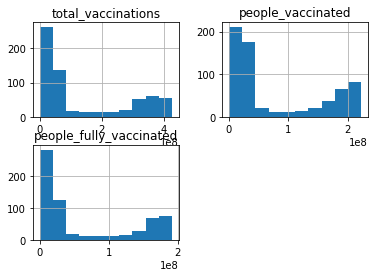

In [ ]:
dataset1[numerical_features].hist()

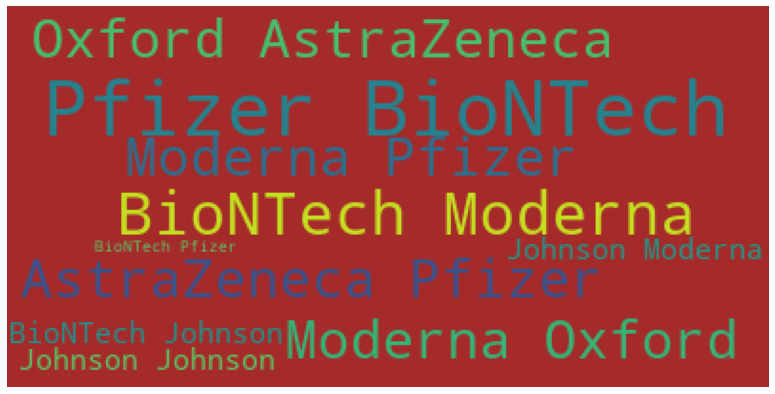

In [ ]:
wordCloud = WordCloud(
    background_color='brown',
    max_font_size = 40).generate(' '.join(dataset1.vaccine))
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

191823814


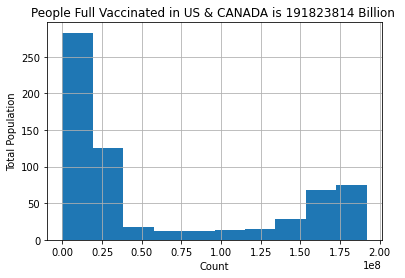

In [ ]:
#Q3
dataset1[numerical_features].hist(column = 'people_fully_vaccinated')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("People Full Vaccinated in US & CANADA is 191823814 Billion ")
column = dataset1["people_fully_vaccinated"]
max_value = column.max()
print(max_value)

426728092


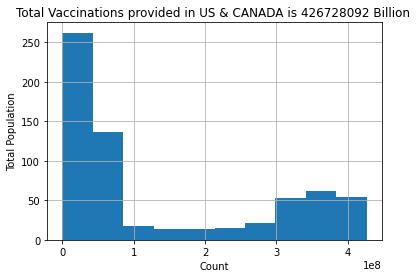

In [ ]:
dataset1[numerical_features].hist(column = 'total_vaccinations')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("Total Vaccinations provided in US & CANADA is 426728092 Billion ")
column = dataset1["total_vaccinations"]
max_value = column.max()
print(max_value)

222591394


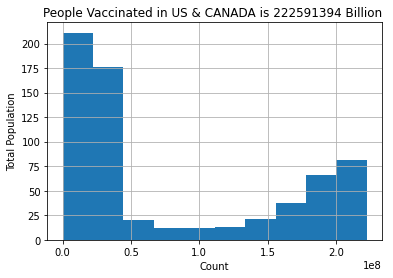

In [ ]:
dataset1[numerical_features].hist(column = 'people_vaccinated')
plt.xlabel("Count")
plt.ylabel("Total Population")
plt.title("People Vaccinated in US & CANADA is 222591394 Billion ")
column = dataset1["people_vaccinated"]
max_value = column.max()
print(max_value)

In [ ]:
# describe the data
# categorical values
categorical_features = [feature for feature in dataset1.columns if dataset1[feature].dtype == 'O']
print('Number of numerical variables: ', len(categorical_features))

Number of numerical variables:  3


In [ ]:
dataset1[categorical_features].describe()

,date,location,vaccine
count,649,649,649
unique,327,2,4
top,2020-12-31,United States,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
freq,2,327,322


#Missing values

In [ ]:
dataset1.isnull().count()

date                       649
location                   649
total_vaccinations         649
people_vaccinated          649
people_fully_vaccinated    649
vaccine                    649
dtype: int64

In [ ]:
dataset1['people_fully_vaccinated'].isnull().any()

False

#DATA TRANSFORMATION

In [ ]:
# one hot encoding
print(dataset1['location'].unique())
print(dataset1['vaccine'].unique())

['United States' 'Canada']
['Pfizer/BioNTech' 'Moderna, Pfizer/BioNTech'
 'Johnson&Johnson, Moderna, Pfizer/BioNTech'
 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']


In [ ]:
dataset1['location'].value_counts()
dataset1['vaccine'].value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech    322
Johnson&Johnson, Moderna, Pfizer/BioNTech       245
Moderna, Pfizer/BioNTech                         72
Pfizer/BioNTech                                  10
Name: vaccine, dtype: int64

In [ ]:
dataset1 = pd.get_dummies(dataset1, columns = ['location', 'vaccine'])
dataset1.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,location_Canada,location_United States,"vaccine_Johnson&Johnson, Moderna, Pfizer/BioNTech","vaccine_Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","vaccine_Moderna, Pfizer/BioNTech",vaccine_Pfizer/BioNTech
0,2020-12-13,20013,17073,3579,0,1,0,0,0,1
1,2020-12-14,24300,21231,3668,0,1,0,0,0,1
2,2020-12-15,72853,67597,3851,0,1,0,0,0,1
3,2020-12-16,231420,220759,4214,0,1,0,0,0,1
4,2020-12-17,501644,484011,4743,0,1,0,0,0,1


In [146]:
dataset1['year'] = pd.DatetimeIndex(dataset1['date']).year

In [ ]:
dataset1 = pd.get_dummies(dataset1, columns = ['location', 'vaccine'])
dataset1.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,location_Canada,location_United States,"vaccine_Johnson&Johnson, Moderna, Pfizer/BioNTech","vaccine_Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","vaccine_Moderna, Pfizer/BioNTech",vaccine_Pfizer/BioNTech
0,2020-12-13,20013,17073,3579,0,1,0,0,0,1
1,2020-12-14,24300,21231,3668,0,1,0,0,0,1
2,2020-12-15,72853,67597,3851,0,1,0,0,0,1
3,2020-12-16,231420,220759,4214,0,1,0,0,0,1
4,2020-12-17,501644,484011,4743,0,1,0,0,0,1


In [ ]:
dataset1 = pd.get_dummies(dataset1, columns = ['location', 'vaccine'])
dataset1.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,location_Canada,location_United States,"vaccine_Johnson&Johnson, Moderna, Pfizer/BioNTech","vaccine_Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","vaccine_Moderna, Pfizer/BioNTech",vaccine_Pfizer/BioNTech
0,2020-12-13,20013,17073,3579,0,1,0,0,0,1
1,2020-12-14,24300,21231,3668,0,1,0,0,0,1
2,2020-12-15,72853,67597,3851,0,1,0,0,0,1
3,2020-12-16,231420,220759,4214,0,1,0,0,0,1
4,2020-12-17,501644,484011,4743,0,1,0,0,0,1


Text(0.5, 1.0, 'By 2020 to 2021 in both US & Canada 20 Billion people got fully vaccinated')

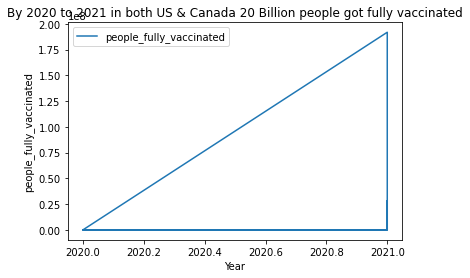

In [165]:
#Q2) 2020 TO 2021 
dataset1.plot(x="year",y="people_fully_vaccinated")
plt.xlabel("Year")
plt.ylabel("people_fully_vaccinated")
plt.title("By 2020 to 2021 in both US & Canada 20 Billion people got fully vaccinated")
